In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt, font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pickle
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('catty.csv')

In [3]:
df.head(10)

,Employee_ID,Date_Time,Workload_Per_Day,Break_Frequency,Sleep_Hours,Physical_Activity,Caffeine_Intake,Stress_Level,Mood
0,E1045,1/12/2024,7.4,5,7.4,30.4,83.6,6,Neutral
1,E1014,1/15/2024,6.0,5,8.1,81.2,108.5,4,Happy
2,E1037,1/29/2024,6.1,3,6.4,19.5,241.3,5,Neutral
3,E1040,1/28/2024,7.1,5,6.2,30.2,196.2,6,Neutral
4,E1008,1/24/2024,6.1,5,8.1,59.0,136.4,4,Neutral
5,E1021,1/25/2024,11.7,1,5.2,14.0,104.6,9,Sad
6,E1017,1/12/2024,8.9,1,5.8,13.8,208.8,8,Sad
7,E1033,1/24/2024,10.8,2,5.2,11.4,165.6,8,Sad
8,E1038,1/7/2024,8.1,1,6.0,16.8,119.2,8,Sad
9,E1001,1/16/2024,7.6,4,8.1,52.2,184.7,6,Neutral


In [4]:
df.tail()

,Employee_ID,Date_Time,Workload_Per_Day,Break_Frequency,Sleep_Hours,Physical_Activity,Caffeine_Intake,Stress_Level,Mood
1458,E1004,1/27/2024,11.1,2,5.7,10.3,205.6,8,Sad
1459,E1049,1/18/2024,10.5,1,5.4,19.0,182.6,10,Sad
1460,E1035,1/2/2024,5.1,7,7.5,62.4,252.5,3,Happy
1461,E1022,1/3/2024,7.3,4,6.2,24.6,131.2,6,Neutral
1462,E1048,1/20/2024,6.0,5,6.1,50.2,200.5,6,Neutral


In [5]:
df.describe()


,Workload_Per_Day,Break_Frequency,Sleep_Hours,Physical_Activity,Caffeine_Intake,Stress_Level
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,7.632194,4.054682,7.185988,40.420096,150.507861,5.049897
std,1.884118,2.216964,1.448015,23.140889,49.379857,2.456093
min,4.800000,1.000000,4.800000,9.800000,0.000000,1.000000
25%,6.200000,2.000000,5.800000,17.900000,118.800000,3.000000
50%,7.000000,4.000000,7.200000,39.900000,149.800000,5.000000
75%,8.800000,6.000000,8.400000,57.000000,183.950000,6.500000
max,12.200000,8.000000,10.200000,93.500000,354.300000,10.000000


In [6]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [7]:
df.head(10)

,Employee_ID,Date_Time,Workload_Per_Day,Break_Frequency,Sleep_Hours,Physical_Activity,Caffeine_Intake,Stress_Level,Mood
0,45,3,7.4,5,7.4,30.4,83.6,6,1
1,14,6,6.0,5,8.1,81.2,108.5,4,0
2,37,21,6.1,3,6.4,19.5,241.3,5,1
3,40,20,7.1,5,6.2,30.2,196.2,6,1
4,8,16,6.1,5,8.1,59.0,136.4,4,1
5,21,17,11.7,1,5.2,14.0,104.6,9,2
6,17,3,8.9,1,5.8,13.8,208.8,8,2
7,33,16,10.8,2,5.2,11.4,165.6,8,2
8,38,27,8.1,1,6.0,16.8,119.2,8,2
9,1,7,7.6,4,8.1,52.2,184.7,6,1


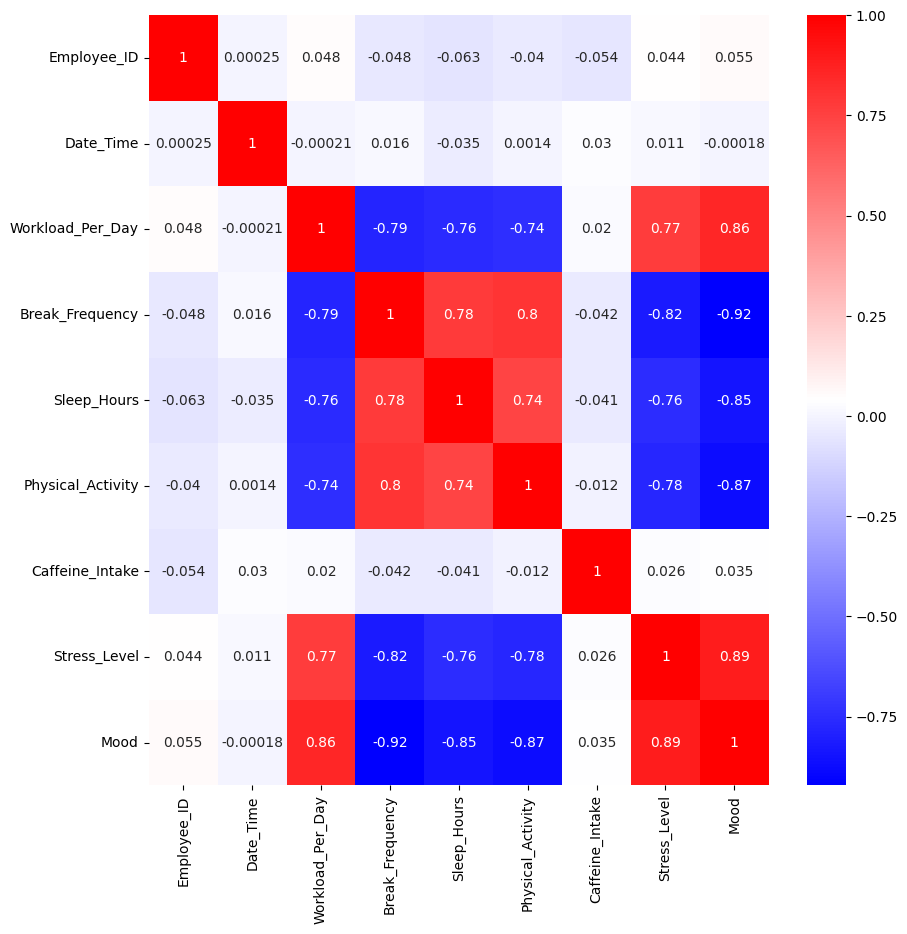

In [8]:
corrmat = df.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(10, 10))

g = sns.heatmap(df[top_corr_features].corr(),
                annot=True,
                cmap='bwr')

In [9]:
X=df.drop(['Mood'],axis=1)

y=df['Mood']

In [10]:
scaler = StandardScaler()

scaler.fit(X)

StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape

(1170, 8)

In [13]:
y_train.shape

(1170,)

In [14]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

In [15]:
print("The Training score of Logistic regression is: ",lr.score(X_train,y_train))

f1 = f1_score(y_test, lr_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, lr_pred))

The Training score of Logistic regression is:  0.9914529914529915
F1 Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.95      0.99      0.97        92
           2       0.99      1.00      0.99        96

    accuracy                           0.98       293
   macro avg       0.98      0.98      0.98       293
weighted avg       0.98      0.98      0.98       293



In [16]:
print("The Testing score of Logistic regression is: ",lr.score(X_test,y_test))

The Testing score of Logistic regression is:  0.9795221843003413


In [17]:
svc = SVC(kernel='linear', random_state=0)  

svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

In [18]:
print("The Training score of SVC is: ",svc.score(X_train, y_train))

f1 = f1_score(y_test, svc_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, svc_pred))

The Training score of SVC is:  0.9948717948717949
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.98        92
           2       1.00      1.00      1.00        96

    accuracy                           0.99       293
   macro avg       0.99      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



In [19]:
print("The Test score of SVC is: ",svc.score(X_test, y_test))

The Test score of SVC is:  0.9897610921501706


In [20]:
rf = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

In [21]:
print("The Training score of RandomForestClassifier is: ",rf.score(X_train, y_train))

f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, rf_pred))

The Training score of RandomForestClassifier is:  0.9888888888888889
F1 Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.95      1.00      0.97        92
           2       1.00      1.00      1.00        96

    accuracy                           0.98       293
   macro avg       0.98      0.98      0.98       293
weighted avg       0.98      0.98      0.98       293



In [22]:
print("The Testing score of RandomForestClassifier is: ",rf.score(X_test, y_test))

The Testing score of RandomForestClassifier is:  0.9829351535836177


In [23]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

In [24]:
print("The Training score of GradientBoostingClassifier is: ",gb.score(X_train, y_train))

f1 = f1_score(y_test, gb_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")

print(classification_report(y_test, gb_pred))

The Training score of GradientBoostingClassifier is:  1.0
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.96      1.00      0.98        92
           2       1.00      1.00      1.00        96

    accuracy                           0.99       293
   macro avg       0.99      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



In [25]:
print("The Testing score of RandomForestClassifier is: ",gb.score(X_test, y_test))

The Testing score of RandomForestClassifier is:  0.9863481228668942


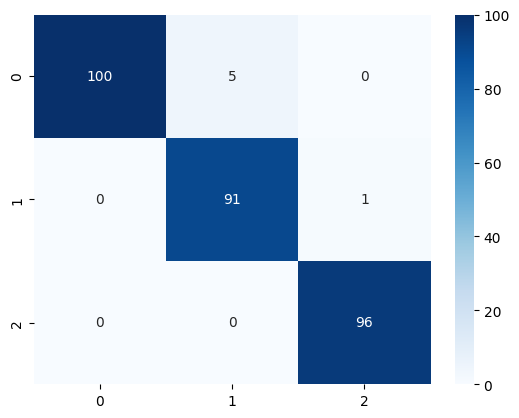

In [26]:
sns.heatmap(confusion_matrix(y_test, lr_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

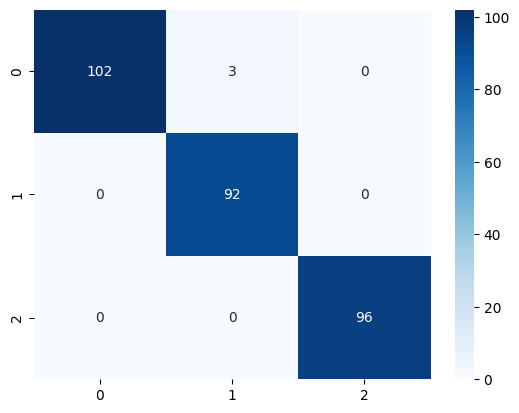

In [27]:
sns.heatmap(confusion_matrix(y_test, svc_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

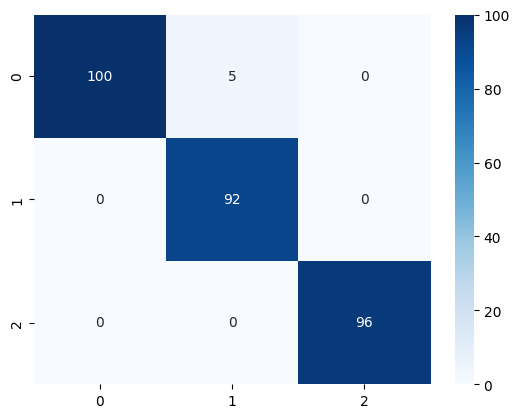

In [28]:
sns.heatmap(confusion_matrix(y_test, rf_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

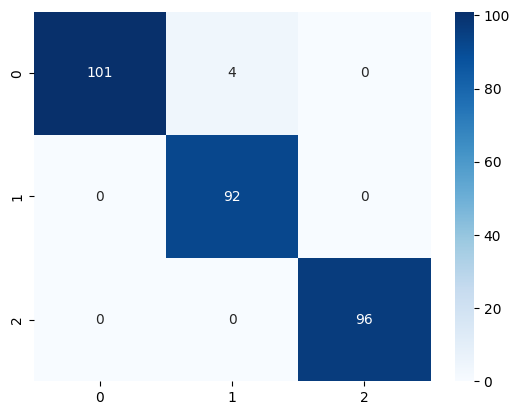

In [29]:
sns.heatmap(confusion_matrix(y_test, gb_pred),  
            annot=True,  
            fmt="d",  
            cmap='Blues')
plt.show()

In [30]:
filename = 'model.sav'

pickle.dump(rf, open(filename, 'wb'))